In [2]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In [5]:
x = np.arange(-1,3,0.05)
y = np.arange(-1,3,0.05)
a,b = np.meshgrid(x,y)
SSE = (2-a-b)**2 + (4 - 3*a - b)**2

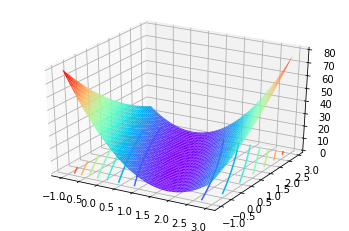

In [6]:
fig = plt.figure()
ax = plt.axes(projection="3d")

ax.plot_surface(a,b,SSE,cmap="rainbow")
ax.contour(a,b,SSE,zdir="z",offset=0,cmap="rainbow") #生成z方向投影，投影到x-y平面
plt.show()

In [1]:
# 梯度下降
# 点的梯度就是移动方向

In [8]:
import torch

In [9]:
#设置初始参数
weights = torch.zeros(2,1,requires_grad = True)
weights

tensor([[0.],
        [0.]], requires_grad=True)

In [11]:
# 特征张量
X = torch.tensor([[1.,1],[3,1]],requires_grad = True)
X

tensor([[1., 1.],
        [3., 1.]], requires_grad=True)

In [13]:
y = torch.tensor([2.,4],requires_grad = True).reshape(2,1)
y

tensor([[2.],
        [4.]], grad_fn=<ViewBackward>)

In [14]:
# 设置步长
eps = torch.tensor(0.01,requires_grad = True)
eps

tensor(0.0100, requires_grad=True)

In [15]:
# 梯度计算公式 grad_w =  1/m * X^t(X * w^t - Y)
grad = torch.mm(X.t(),(torch.mm(X,weights)-y)) / 2
grad

tensor([[-7.],
        [-3.]], grad_fn=<DivBackward0>)

In [16]:
weights = weights - eps * grad
weights

tensor([[0.0700],
        [0.0300]], grad_fn=<SubBackward0>)

In [17]:
# 迭代3轮
for k in range(3):
    grad = torch.mm(X.t(),(torch.mm(X,weights)-y)) / 2
    weights = weights - eps * grad
    
weights

tensor([[0.2563],
        [0.1102]], grad_fn=<SubBackward0>)

In [18]:
# 函数迭代
def gradDescent(X,y,eps = torch.tensor(0.01,requires_grad=True),numIt=1000):
    m,n = X.shape
    weights = torch.zeros(n,1,requires_grad = True)
    for k in range(numIt):
        grad = torch.mm(X.t(),(torch.mm(X,weights)-y)) / 2
        weights = weights - eps * grad
    return weights

In [20]:
X = torch.tensor([[1.,1],[3,1]],requires_grad = True)
X

tensor([[1., 1.],
        [3., 1.]], requires_grad=True)

In [23]:
y = torch.tensor([2.,4],requires_grad = True).reshape(2,1)
y

tensor([[2.],
        [4.]], grad_fn=<ViewBackward>)

In [24]:
gradDescent(X,y)

tensor([[1.0372],
        [0.9102]], grad_fn=<SubBackward0>)